In [1]:
from astropy.io import fits
from astropy.visualization import quantity_support
from os.path import join as jp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fits_path = '../fits'

pla = dict()
pla[2] = fits.open(jp(fits_path,'pla0002.mt'))
pla[3] = fits.open(jp(fits_path,'pla0003.mt'))

In [3]:
pla[2]

In [4]:
pla[2].info()

Filename: ../fits/pla0002.mt
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      97   (1461,)   float32   


In [5]:
hdr = pla[2][0].header
hdr

SIMPLE  =                    T / Standard FITS format: NOST 100-2.0             
BITPIX  =                  -32 / No. of bits per pixel                          
NAXIS   =                    1 / No. of axes in image                           
NAXIS1  =                 1461 / No. of pixels                                  
EXTEND  =                    T / FITS extension may be present                  
COMMENT NOST 100-2.0: Hanisch,R. et al. 2001, Astron. & Astrophys. 376, 559     
                                                                                
CRPIX1  =                   1. / Reference pixel                                
CRVAL1  =                2200. / Coordinate at reference pixel                  
CDELT1  =                   5. / Coord. incr. per pixel (original value)        
CTYPE1  = '                '   / Units of coordinate                            
BUNIT   = '                '   / Units of data values                           
DATAMAX =       0.2049001753

In [6]:
n    = hdr['NAXIS1']
lo   = hdr['CRVAL1']
step = hdr['CDELT1']
lmb = np.arange(lo, lo + n * step, step)

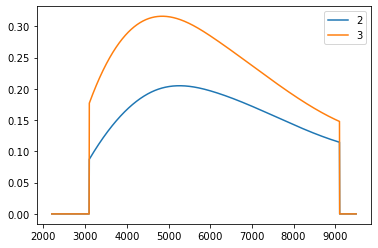

In [7]:
plt.plot(lmb, pla[2][0].data, label='2') # 5500
plt.plot(lmb, pla[3][0].data, label='3') # 6000
plt.legend()

In [8]:
from astropy.modeling.models import BlackBody
from astropy import units as u
from astropy.constants import b_wien

In [9]:
def Planck(wl, T):
    bb = BlackBody(5500 * u.K, scale=1.0e-07 * (u.erg / (u.AA * u.s * u.sr * u.cm**2)))
    return bb(wl * u.AA)

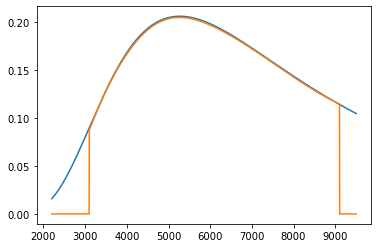

In [10]:
plt.plot(lmb, Planck(lmb, 5500))
plt.plot(lmb, pla[2][0].data)

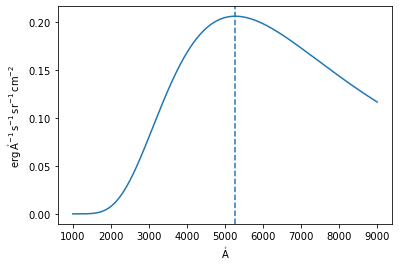

In [11]:
#bb = BlackBody(temperature=5500*u.K)
bb = BlackBody(5500 * u.K, scale=1.0e-07 * (u.erg / (u.AA * u.s * u.sr * u.cm**2)))
wav = np.arange(1000, 9000) * u.AA
flux = bb(wav)

with quantity_support():
    plt.figure()
    plt.plot(wav, flux)
    plt.axvline(bb.lambda_max.to(u.AA, equivalencies=u.spectral()).value, ls='--')
    plt.show()
